In [1]:
import sys
import os

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from luxgiant_dstream.manhattan_type import miami_draw

In [2]:
import ipywidgets as widgets
from IPython.display import display

# Create interactive widgets for input
input_path = widgets.Text(
    value='/home/luis/data/gwasResult/',
    description='Path to project folder:',
    style={'description_width': 'initial'}
)

top_name = widgets.Text(
    value='pooled_meta_analysis_luxgiant_multi1_hrc.csv',
    description='Name of GWAS summary file (top):',
    style={'description_width': 'initial'}
)

top_highlight = widgets.Text(
    value='',
    description='Name of file with SNPs to highlight (top):',
    style={'description_width': 'initial'}
)

top_annotate = widgets.Text(
    value='',
    description='Name of file with SNPs to annotate (top):',
    style={'description_width': 'initial'}
)

bottom_name = widgets.Text(
    value='multi_ethnic_meta_summary_statts_harmonised_GCST90275127.tsv',
    description='Name of GWAS reference summary file:',
    style={'description_width': 'initial'}
)

bottom_highlight = widgets.Text(
    value='multiancestry_tophits.csv',
    description='Name of file with SNPs to highlight (bottom):',
    style={'description_width': 'initial'}
)

bottom_annotate = widgets.Text(
    value='',
    description='Name of file with SNPs to annotate (bottom):',
    style={'description_width': 'initial'}
)

# Display the widgets
display(input_path, top_name, top_highlight, top_annotate, bottom_name, bottom_highlight, bottom_annotate)

# Function to get the text parameter values
def get_params():
    return input_path.value, top_name.value, top_highlight.value, top_annotate.value, bottom_name.value, bottom_highlight.value, bottom_annotate.value

Text(value='/home/luis/data/gwasResult/', description='Path to project folder:', style=TextStyle(description_w…

Text(value='pooled_meta_analysis_luxgiant_multi1_hrc.csv', description='Name of GWAS summary file (top):', sty…

Text(value='', description='Name of file with SNPs to highlight (top):', style=TextStyle(description_width='in…

Text(value='', description='Name of file with SNPs to annotate (top):', style=TextStyle(description_width='ini…

Text(value='multi_ethnic_meta_summary_statts_harmonised_GCST90275127.tsv', description='Name of GWAS reference…

Text(value='multiancestry_tophits.csv', description='Name of file with SNPs to highlight (bottom):', style=Tex…

Text(value='', description='Name of file with SNPs to annotate (bottom):', style=TextStyle(description_width='…

In [3]:
# Use the parameter values
path_params = get_params()
print(f"Parameter 1: {path_params[0]}")
print(f"Parameter 2: {path_params[1]}")
print(f"Parameter 3: {path_params[2]}")
print(f"Parameter 4: {path_params[3]}")
print(f"Parameter 5: {path_params[4]}")
print(f"Parameter 6: {path_params[5]}")
print(f"Parameter 7: {path_params[6]}")

Parameter 1: /home/luis/data/gwasResult/
Parameter 2: pooled_meta_analysis_luxgiant_multi1_hrc.csv
Parameter 3: 
Parameter 4: 
Parameter 5: multi_ethnic_meta_summary_statts_harmonised_GCST90275127.tsv
Parameter 6: multiancestry_tophits.csv
Parameter 7: 


In [4]:
import pandas as pd

df_top = pd.read_table(
    os.path.join(path_params[0], path_params[1]), sep='\t',
    usecols=['MarkerName', 'Pvalue', '#CHROM', 'POS']
)
df_top.columns = ['ID', 'P', '#CHROM', 'POS']
df_top.head(5)

,ID,P,#CHROM,POS
0,rs2326918,0.05325,6,130840091
1,rs66941928,0.74340,3,176666749
2,rs6039163,0.68180,20,8411670
3,rs530960868,0.23040,8,133726206
4,rs6977693,0.06371,7,145771806


In [5]:
df_bottom = pd.read_csv(
    os.path.join(path_params[0], path_params[4]), sep='\t',
    usecols=['CHR', 'BP', 'P', 'SNP']
)
df_bottom.columns = ['#CHROM', 'POS', 'P', 'ID']
df_bottom['POS'] = df_bottom['POS'].astype(int)
df_bottom['#CHROM'] = df_bottom['#CHROM'].astype(int)
df_bottom.head(5)

,#CHROM,POS,P,ID
0,1,727242,0.8421,rs61769339
1,1,730869,0.1812,rs200188737
2,1,740738,0.5216,rs146067153
3,1,758245,0.7413,rs190214723
4,1,758351,0.8486,rs12238997


In [6]:
df_bottom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8561605 entries, 0 to 8561604
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   #CHROM  int64  
 1   POS     int64  
 2   P       float64
 3   ID      object 
dtypes: float64(1), int64(2), object(1)
memory usage: 261.3+ MB


In [7]:
if path_params[2] is not None and path_params[2] != '':
    top_highlit_path = os.path.join(path_params[0], path_params[2])
    if os.path.exists(top_highlit_path):
        df_high_top = pd.read_csv(
            top_highlit_path, sep='\t'
        )
        top_to_highlight = df_high_top['SNP'].to_list()
        print(top_to_highlight[:10])
        del df_high_top
    else:
        print('Path to file with SNPs to highlight does not exist (top)')
        top_to_highlight = []
else:
    print('No file with SNPs to highlight (top)')
    top_to_highlight = []

No file with SNPs to highlight (top)


In [8]:
if path_params[3] is not None and path_params[3] != '':
    top_anno_path = os.path.join(path_params[0], path_params[3])
    if os.path.exists(top_anno_path):
        df_anno_top = pd.read_csv(
            top_anno_path, sep='\t'
        )
        top_to_annotate = df_anno_top['SNP'].to_list()
        print(top_to_annotate[:10])
        del df_anno_top
    else:
        print('Path to file with SNPs to annotate does not exist (top)')
        top_to_annotate = []
else:
    print('No file with SNPs to annotate (top)')
    top_to_annotate = []

No file with SNPs to annotate (top)


In [9]:
if path_params[5] is not None and path_params[5] != '':
    bottom_highlit_path = os.path.join(path_params[0], path_params[5])
    if os.path.exists(bottom_highlit_path):
        df_high_bottom = pd.read_csv(
            bottom_highlit_path, sep='\t'
        )
        bottom_to_highlight = df_high_bottom['SNP'].to_list()
        print(bottom_to_highlight[:10])
        del df_high_bottom
    else:
        print('Path to file with SNPs to highlight does not exist (bottom)')
        bottom_to_highlight = []
else:
    print('No file with SNPs to highlight (bottom)')
    bottom_to_highlight = []

['rs11164870', 'rs6806917', 'rs16843452', 'rs6469271', 'rs1078514', 'rs28648524', 'rs11650438', 'rs4485435', 'rs6060983', 'rs1736020']


In [10]:
if path_params[6] is not None and path_params[6] != '':
    bottom_anno_path = os.path.join(path_params[0], path_params[6])
    if os.path.exists(bottom_anno_path):
        df_anno_bottom = pd.read_csv(
            bottom_anno_path, sep='\t'
        )
        bottom_to_annotate = df_anno_bottom['SNP'].to_list()
        print(bottom_to_annotate[:10])
        del df_anno_bottom
    else:
        print('Path to file with SNPs to annotate does not exist (bottom)')
        bottom_to_annotate = []
else:
    print('No file with SNPs to annotate (bottom)')
    bottom_to_annotate = []

No file with SNPs to annotate (bottom)


/home/luis/CGE/luxgiant-dstream/luxgiant_dstream/manhattan_type.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top['split_by']   = 'top'
/home/luis/CGE/luxgiant-dstream/luxgiant_dstream/manhattan_type.py:325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bottom['split_by']= 'bottom'


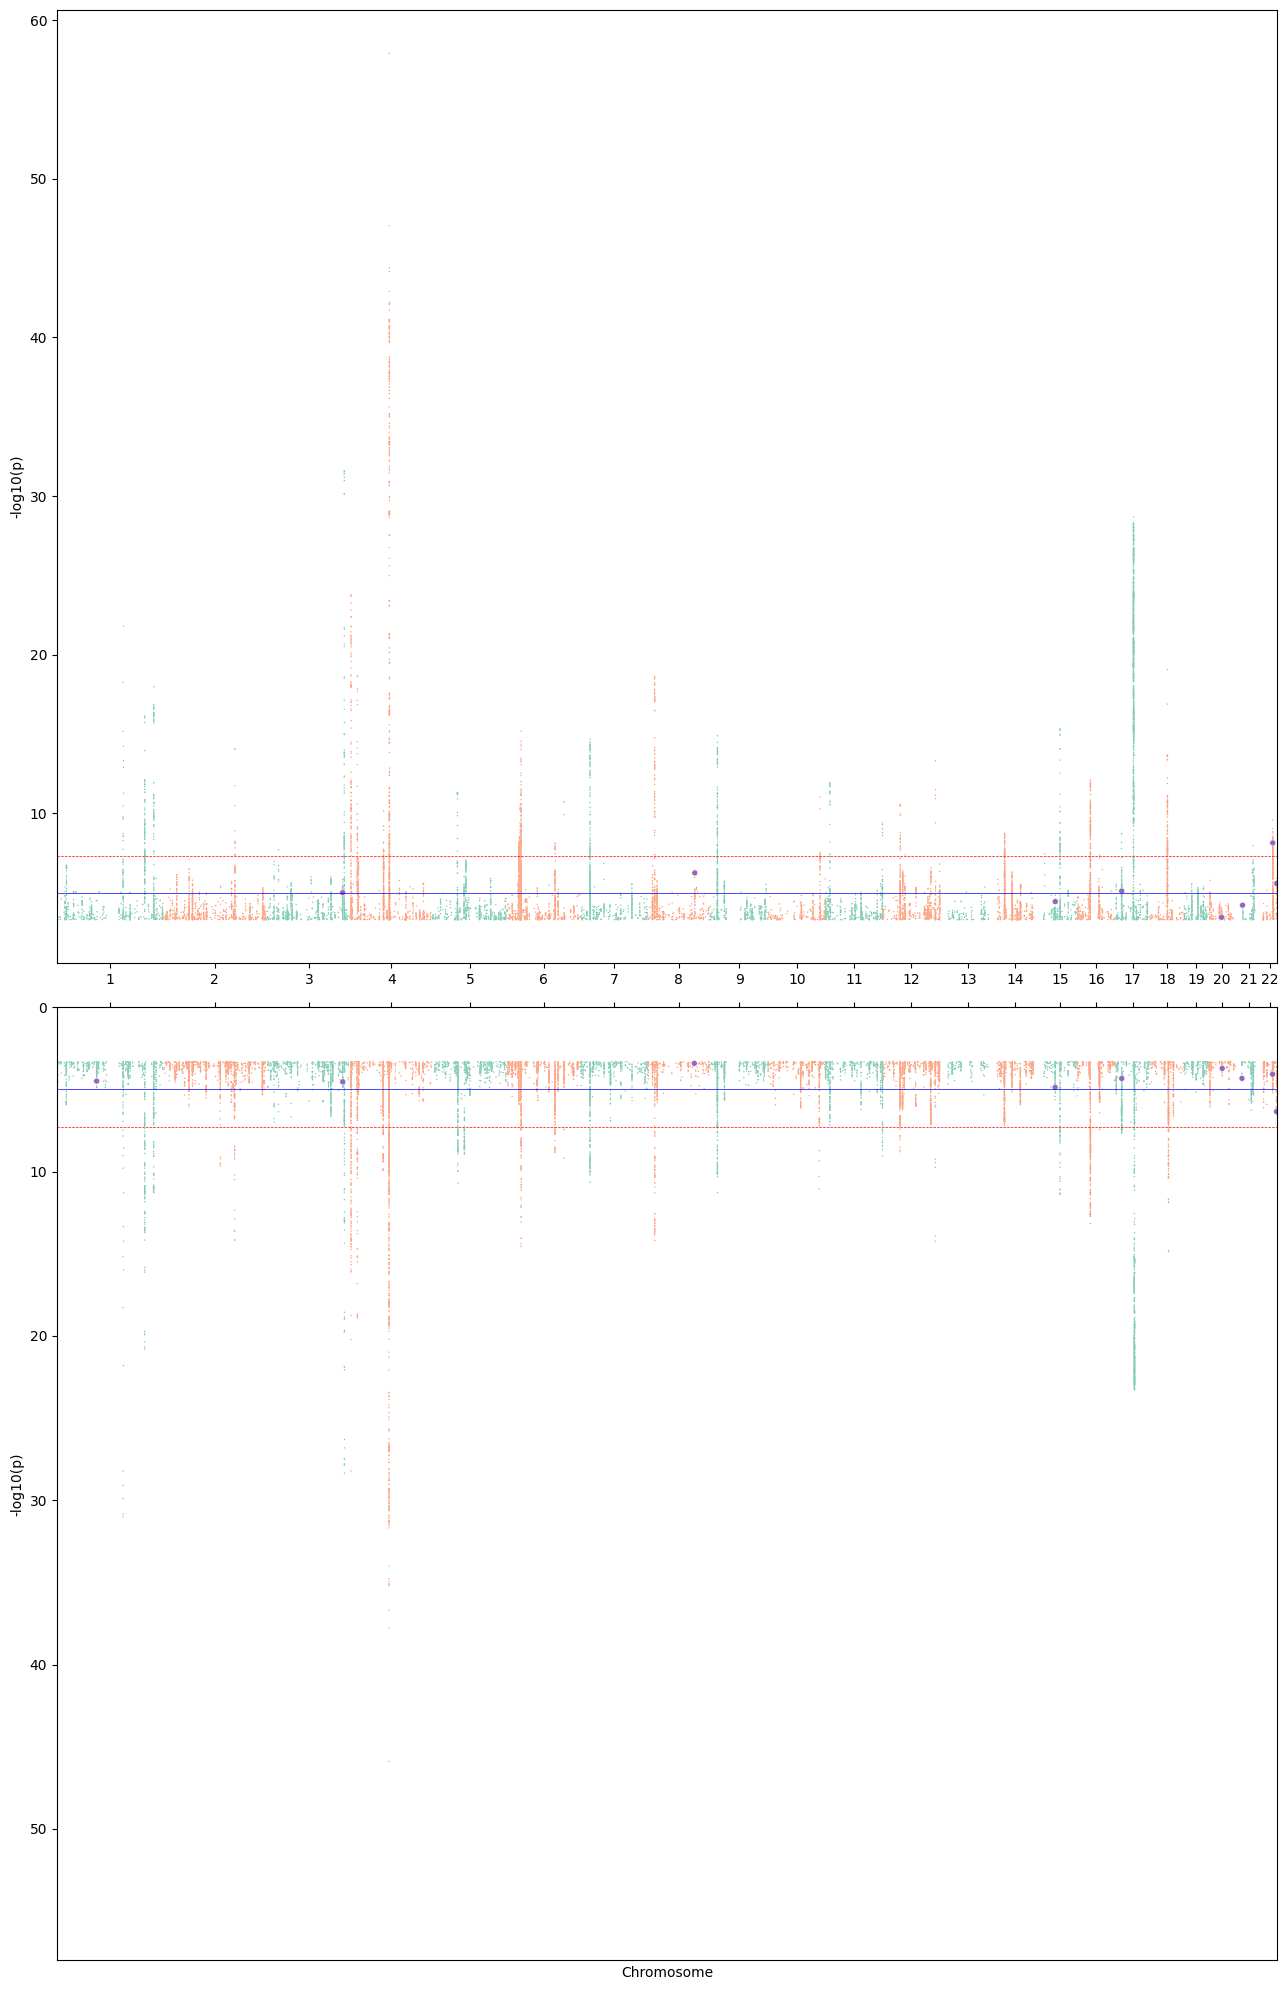

True

In [11]:
miami_draw(
    df_top=df_top, 
    df_bottom=df_bottom,
    snp_col='ID',
    chr_col='#CHROM',
    pos_col='POS',
    p_col='P',
    plots_dir=path_params[0], 
    top_highlights=top_to_highlight, 
    top_annotations=top_to_annotate,
    bottom_highlights=bottom_to_highlight, 
    bottom_annotations=[snp for snp in bottom_to_annotate if snp in top_to_annotate]
)